In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
# read excel file
df_asli = pd.read_excel('./data/kemayoran 2000-2022.xlsx')

In [3]:
# hasil excel
df_asli

,Tanggal,RR
0,01-01-2000,9.1
1,02-01-2000,8888.0
2,03-01-2000,8888.0
3,04-01-2000,50.2
4,05-01-2000,1.6
...,...,...
8151,26-04-2022,26.4
8152,27-04-2022,8888.0
8153,28-04-2022,7.5
8154,29-04-2022,8888.0


In [8]:
train = df_asli
train['Tanggal'] = pd.to_datetime(train['Tanggal'], infer_datetime_format=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  8156 non-null   datetime64[ns]
 1   RR       7883 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 127.6 KB


In [9]:
# dataframe prediksi
train.tail()

,Tanggal,RR
8151,2022-04-26,26.4
8152,2022-04-27,8888.0
8153,2022-04-28,7.5
8154,2022-04-29,8888.0
8155,2022-04-30,0.0


In [11]:
# check nilai null
# jumlah null value train
train.isnull().sum()

Tanggal      0
RR         273
dtype: int64

In [12]:
# replace NaN ke 0
df_predict_clean = train.fillna(0)
# cek NaN di df baru
df_predict_clean.isnull().sum()

Tanggal    0
RR         0
dtype: int64

In [36]:
df_predict_clean

,RR
Tanggal,
2000-01-01,9.1
2000-02-01,8888.0
2000-03-01,8888.0
2000-04-01,50.2
2000-05-01,1.6
...,...
2022-04-26,26.4
2022-04-27,8888.0
2022-04-28,7.5


In [42]:
delapan_ribu = df_predict_clean[df_predict_clean['RR'] > 100.0]
delapan_ribu

,RR
Tanggal,
2000-02-01,8888.0
2000-03-01,8888.0
2000-08-01,8888.0
2000-01-17,8888.0
2000-01-31,8888.0
...,...
2022-02-14,8888.0
2022-07-04,8888.0
2022-08-04,8888.0


<AxesSubplot:xlabel='Tanggal', ylabel='RR'>

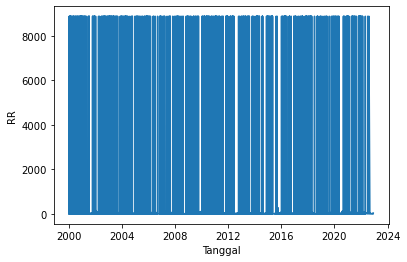

In [21]:
# plotting data setelah clean
sns.lineplot(x="Tanggal", y="RR", data=df_predict_clean)

# Identifikasi Data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_predict_clean['RR'], model='additive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,12)

# Visualisasi

In [ ]:
sns.lineplot(data=df_predict_tahun_clean,x='tahun',y='RR',color='green')

In [ ]:
# data maksimal hingga 2005
df_test = df_predict_tahun_clean[df_predict_tahun_clean['tahun'] <= 2010]

In [ ]:
df_test.info

In [ ]:
sns.lineplot(data=df_test,x='tahun',y='RR',color='green')

In [ ]:
# avg data clean
avg_data_clean = pd.DataFrame(df_predict_tahun_clean.groupby('tahun')['RR'].apply(np.mean))

In [ ]:
avg_data_clean.plot()
plt.show()

In [ ]:
avg_df_test = pd.DataFrame(df_test.groupby('tahun')['RR'].apply(np.mean))

In [ ]:
avg_df_test.plot()
plt.show()

In [ ]:
df_predict_tahun_clean

In [ ]:
# sarima model with avg_df_test
from statsmodels.tsa.statespace.sarimax import SARIMAX
s_mod = SARIMAX(avg_df_test['RR'],order=(1,1,0),seasonal_order=(0,0,0,1))
prediksi_1 = s_mod.fit().predict()